# Model validation

In [42]:
from imp import reload
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid.axislines import Subplot
from matplotlib import rcParams
import sys, os
import time
sys.path.append(os.path.abspath('../')) # include path with style
sys.path.append(os.path.abspath('../simulation/')) # include path with simulation specifications
import style as style; reload(style)
import helper_functions as hf; reload(hf)

# Import specific moduls
import model_class; reload(model_class)

%matplotlib inline

save_fig = True
xfactor = 2.6
style.rcParams['figure.figsize'] = (xfactor*6.2, xfactor*3.83) 
figure_path = os.path.join(".", "figures")

reverse_order = True # do analysis such that plots resemble those of the paper (starting with L6i)
colors = style.colors

## Synapse numbers

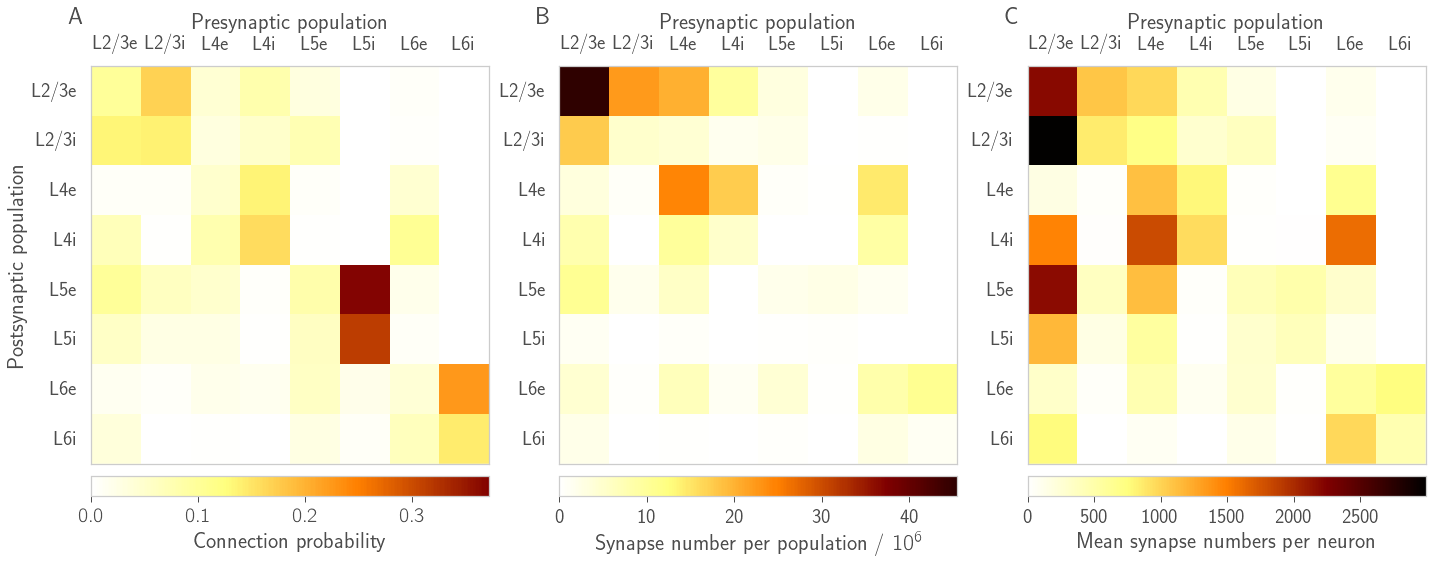

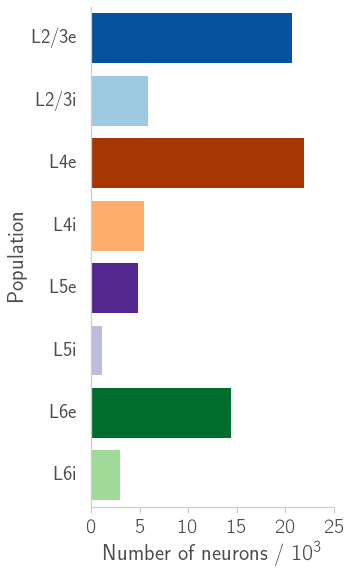

In [67]:
## from matplotlib import cm    
from mpl_toolkits.axes_grid1 import make_axes_locatable
model = model_class.model()
label_populations = hf.rlbl(model.populations)

def plot_heatmap(ax, data, cbar_label, cbar_format, clim, cbar_ticks):
    extent = [0, 8, 0, 8]
    heatmap = ax.imshow(data, interpolation='none', extent=extent, cmap=cm.afmhot_r)
    
    # Color bar (with tight layout)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", "5%", pad="3%")
    cbar = plt.colorbar(heatmap, cax=cax, format=cbar_format, label=cbar_label, orientation='horizontal')
    cbar.set_clim(*clim)
    cbar.set_ticks(cbar_ticks)
    
    # Set ticks: left and top
    ticks=np.arange(0.5, 8., 1)
    ax.set_xticks(ticks)
    ax.set_xticklabels(label_populations)
    ax.set_xlabel('Presynaptic population')
    ax.xaxis.set_tick_params(labeltop='on')
    ax.xaxis.set_tick_params(labelbottom='off')
    ax.xaxis.set_label_position("top")
    ax.set_yticks(ticks)
    ax.set_yticklabels(label_populations[::-1])
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
    ax.grid(False)      # Turn of grid (distracts!)
    
# Figure
figsize = (20, 2.6*3.83) 
fig = plt.figure(figsize=figsize)
ax0 = hf.add_subplot(fig, n_rows_cols=(1, 3), index_row_col=(0, 0), rowspan=1, colspan=1)
ax1 = hf.add_subplot(fig, n_rows_cols=(1, 3), index_row_col=(0, 1), rowspan=1, colspan=1)
ax2 = hf.add_subplot(fig, n_rows_cols=(1, 3), index_row_col=(0, 2), rowspan=1, colspan=1)
plot_labels = list("ABC")

######################################################
# Connection probabilities
######################################################
conn_probs = np.array(
            [[0.1009, 0.1689, 0.0437, 0.0818, 0.0323, 0.    , 0.0076, 0.    ],
             [0.1346, 0.1371, 0.0316, 0.0515, 0.0755, 0.    , 0.0042, 0.    ],
             [0.0077, 0.0059, 0.0497, 0.135 , 0.0067, 0.0003, 0.0453, 0.    ],
             [0.0691, 0.0029, 0.0794, 0.1597, 0.0033, 0.    , 0.1057, 0.    ],
             [0.1004, 0.0622, 0.0505, 0.0057, 0.0831, 0.3726, 0.0204, 0.    ],
             [0.0548, 0.0269, 0.0257, 0.0022, 0.06  , 0.3158, 0.0086, 0.    ],
             [0.0156, 0.0066, 0.0211, 0.0166, 0.0572, 0.0197, 0.0396, 0.2252],
             [0.0364, 0.001 , 0.0034, 0.0005, 0.0277, 0.008 , 0.0658, 0.1443]])
data = conn_probs
cbar_label = "Connection probability"
cbar_format= None
clim        = (0, 0.5)
cbar_ticks  = np.arange(0, 0.6, 0.1)
plot_heatmap(ax0, data, cbar_label, cbar_format, clim, cbar_ticks)

######################################################
# Total synapse numbers
######################################################
data = model.C_ab * 1e-6
cbar_label  = "Synapse number per population / $10^{6}$"
cbar_format = "%i"
clim        = (0, 50)
cbar_ticks  = np.arange(0, 60, 10)
plot_heatmap(ax1, data, cbar_label, cbar_format, clim, cbar_ticks)   
    
######################################################
# Synapse numbers per neuron
######################################################
data = (model.C_ab.T / (model.n_neurons * model.area)).T
cbar_label  = "Mean synapse numbers per neuron"
cbar_format = "%i"
clim        = (0, 3000)
cbar_ticks  = np.arange(0, 3500, 500)
plot_heatmap(ax2, data, cbar_label, cbar_format, clim, cbar_ticks)


ax0.set_ylabel('Postsynaptic population')
for ax, label in zip(fig.axes, plot_labels):
    ax.text(-0.02, 1.15, label, transform=ax.transAxes,
            fontsize=style.fontsize_labels_title, fontweight='bold', va='top', ha='right')    

fig_name    = "syn_numbers"
if save_fig:
    hf.saving_fig(fig, figure_path, fig_name, verbose=False)     

######################################################
# Population size
######################################################
xfactor = 1.3
figsize = (xfactor*3.83, xfactor*6.2) 
fig2 = plt.figure(figsize=figsize)
ax3 = hf.add_subplot(fig2, n_rows_cols=(1, 1), index_row_col=(0, 0), rowspan=1, colspan=1)

bar_edges = np.arange(0, 8, 1) + 0.1
if reverse_order:
    bar_edges = bar_edges[::-1]
ticks=np.arange(0.5, 8., 1)

for i in range(8):
    ax3.barh(bar_edges[i], model.n_neurons[i] * 1e-3, height=0.8, color=colors[i], linewidth=0)
ax3.set_yticks(ticks)
yticklabels = label_populations
if reverse_order:
    yticklabels = yticklabels[::-1]
ax3.set_yticklabels(yticklabels)
ax3.set_ylabel('Population')
ax3.set_xlabel('Number of neurons / $10^3$') 
style.fixticks(ax3)
ax3.yaxis.set_ticks_position('none') 
    
fig_name    = "population_size"
if save_fig:
    hf.saving_fig(fig2, figure_path, fig_name, verbose=False) 

In [65]:
total_synapses = np.sum(model.C_ab)

data = (model.C_ab.T / (model.n_neurons * model.area)).T.astype(int)
total_input = np.sum(data, axis=1)

total_synapses,  total_input

(298880941, array([4992, 5282, 2803, 5886, 4940, 2734, 2560, 2429]))

## Synapse number distribution

In [ ]:
data_path = "/export/data-schuessler/data_microcircuit/micro" 
data_file_name = "synapse_numbers.hdf5"
path_data_file = os.path.join(data_path, data_file_name)
with h5py.File(path_data_file, "r") as data_file:
    bla  = 3

## Examplary membrane potentials

save figure to single_membrane_potential_L23e


/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


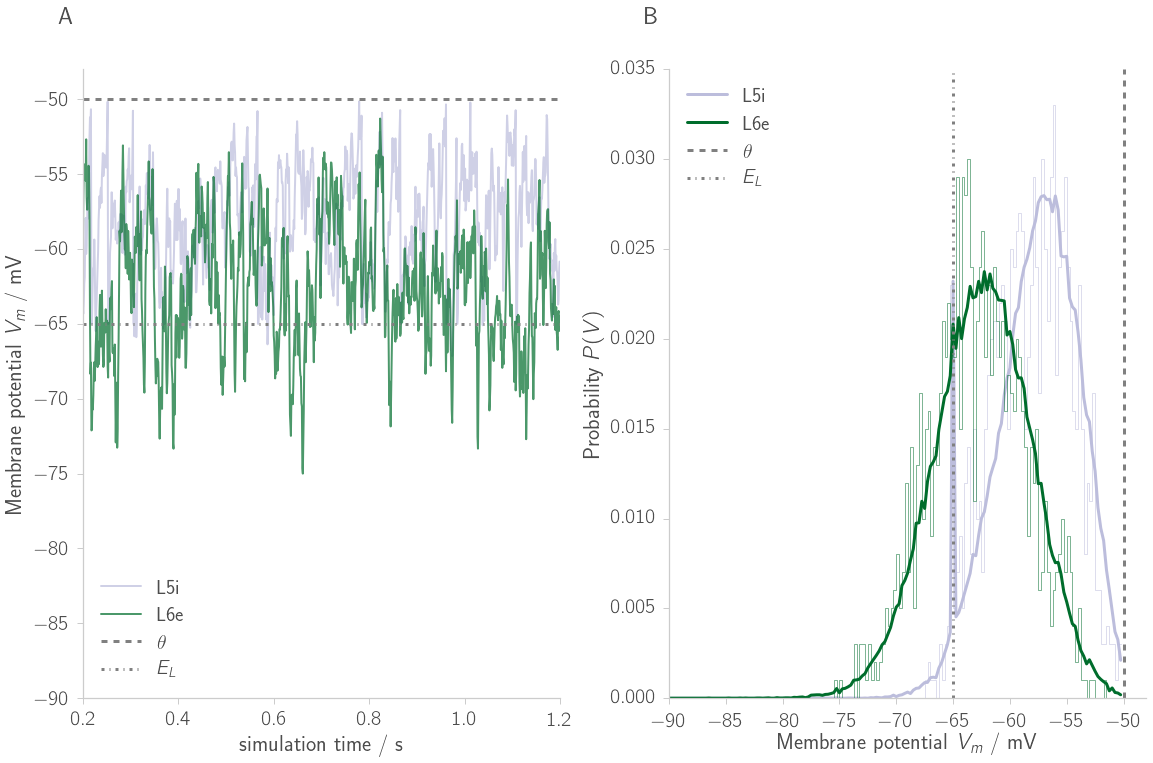

In [3]:
# DATA
sim_spec = "membrane_potential"
data_path = "/export/data-schuessler/data_microcircuit/micro" 
res_file_name = sim_spec + "_res.hdf5"
path_res_file = os.path.join(data_path, res_file_name)

(area, t_sim, t_trans, t_measure, dt, 
    populations, layers, types, 
    n_populations, n_layers, n_types) = hf.basic_data(path_res_file)


with h5py.File(path_res_file, "r") as res_file:
    res_grp = res_file["0"]
    
    dset_times_volt     = res_grp["times_volt"]
    times_volt = dset_times_volt[:]
    t_min_volt = dset_times_volt.attrs["t_min_volt"]
    t_max_volt = dset_times_volt.attrs["t_max_volt"]
    dt_volt    = dset_times_volt.attrs["dt_volt"]
    
    volt_plot         = res_grp["volt_plot"][:]
    volt_histo_single = res_grp["volt_histo_single"][:]
    volt_histo_means  = res_grp["volt_histo_means"][:]
    n_hist_max  = res_grp.attrs["n_hist_max"]
    V_min       = res_grp.attrs["V_min"]
    V_max       = res_grp.attrs["V_max"]
    n_bins_volt = res_grp.attrs["n_bins_volt"]
    n_neurons_rec_voltage = res_grp.attrs["n_neurons_rec_voltage"][:]
    
bin_edges = np.linspace(V_min, V_max, n_bins_volt + 1) 

fig = plt.figure()
if not save_fig:
    suptitle = 'Simulation for: area = %.1f, time = %ims'%(area, t_sim)
    suptitle += '\nfile: ' + sim_spec
    if sli: 
        suptitle += '  SLI'
    fig.suptitle(suptitle, y=0.98)
# Membrane pot over time
ax0 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
# Histogram of membrane pot
ax1 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

n_potentials = min(1, n_hist_max)

for i, population in enumerate(populations):        
    if i==6:
        j = 0
        volt_single = volt_plot[i][j]
        ax0.plot(times_volt, volt_single, 
            '-', color=colors[i], alpha=0.7, linewidth=2., label=hf.rlbl(population))
        
        for j in range(n_potentials):
            # Normalization
            single_hist_normed = volt_histo_single[i, j] / np.sum(volt_histo_single[i, j])
            ax1.plot(bin_edges[:-1], single_hist_normed, 
                 linewidth=1., color=colors[i], alpha=0.5, drawstyle="steps")
        hist_normed = volt_histo_means[i] / np.sum(volt_histo_means[i])
        ax1.plot(bin_edges[:-1], hist_normed, linewidth=3., color=colors[i], label=hf.rlbl(population))
        
    if i==5:
        j = 0
        volt_single = volt_plot[i][j]
        ax0.plot(times_volt, volt_single, 
            '-', color=colors[i], alpha=0.7, linewidth=2., label=hf.rlbl(population))
        
        for j in range(n_potentials):
            # Normalization
            single_hist_normed = volt_histo_single[i, j] / np.sum(volt_histo_single[i, j])
            ax1.plot(bin_edges[:-1], single_hist_normed, 
                 linewidth=1., color=colors[i], alpha=0.5, drawstyle="steps")
        hist_normed = volt_histo_means[i] / np.sum(volt_histo_means[i])
        ax1.plot(bin_edges[:-1], hist_normed, linewidth=3., color=colors[i], label=hf.rlbl(population))

# Threshold and rest potential
y_max_histo = 0.035
model           = model_class.model() 
ax0.plot([0, times_volt[-1] + 1], [model.E_L + model.theta]*2, 
         "--", linewidth=3., color="gray", label="$\\theta$")
ax0.plot([0, times_volt[-1] + 1], [model.E_L]*2, "-.", linewidth=3., color="gray", label="$E_L$")
ax1.plot([model.E_L + model.theta]*2, [0, y_max_histo],
         "--", linewidth=3., color="gray", label="$\\theta$")
ax1.plot([model.E_L]*2, [0, y_max_histo],
         "-.", linewidth=3., color="gray", label="$E_L$")

# Potential over time
xlim = np.array([t_min_volt, t_max_volt]) # s
ax0.set_xlabel('simulation time / s')
ax0.set_ylabel('Membrane potential $V_m$ / mV')
ax0.set_xlim(*xlim)
ax0.set_ylim(-90, V_max + 2)
ax0.legend(loc=0)

# Histogram
ax1.set_xlabel('Membrane potential $V_m$ / mV')
ax1.set_ylabel('Probability $P(V)$')
ax1.set_xlim(-90, V_max + 2)
ax1.set_ylim(0, y_max_histo)
ax1.legend(loc=0)
    
plot_labels = list('AB')
for ax, label in zip(fig.axes, plot_labels):
    ax.text(-0.02, 1.1, label, transform=ax.transAxes,
            fontsize=style.fontsize_labels_title, fontweight='bold', va='top', ha='right')    
    style.fixticks(ax)    

fig_name = "single_membrane_potential"
if save_fig:
    hf.saving_fig(fig, figure_path, fig_name)  